In [1]:
import pandas as pd # powerful Python data analysis toolkit
import numpy as np # numberical calculations
import matplotlib as plt # figures

In [2]:
import matplotlib.pyplot as plt # for a pythnon 3 bug

In [3]:
import astropy as ast # tools for astromomy
from astropy import units as u
from astropy.coordinates import SkyCoord

In [4]:
# Reading the dataset into a dataframe (using Pandas)
data_all = pd.read_csv("../data/TGAS_2MASS_ALLWISE_TYC2.csv")

In [5]:
# a table with the 10 first lines
data_all.head(10)

,ra,dec,hip,duplicated_source,matched_observations,parallax,parallax_error,phot_g_mean_mag,phot_g_n_obs,pmdec,...,e_W2mag,e_W3mag,e_W4mag,nameccf,nameex,nameqph,BTmag,VTmag,ra2000,de2000
0,210.007926,-52.321415,-99999.0,0,10,0.62,0.45,11.530,85,-2.449,...,0.022,0.084,0.483,0000,0,AAAC,11.961,11.736,210.007910,-52.321405
1,209.471668,-52.479936,-99999.0,0,11,1.66,0.42,11.541,92,-7.784,...,0.020,0.041,0.342,0000,0,AAAB,12.626,11.998,209.471612,-52.479904
2,209.504802,-52.456972,-99999.0,0,10,3.05,0.49,11.460,85,-15.116,...,0.020,0.050,-99999.000,dd00,0,AAAU,12.489,11.668,209.504744,-52.456909
3,209.619712,-52.369962,-99999.0,0,10,2.74,0.68,10.976,83,1.688,...,0.019,0.034,-99999.000,hh00,1,AAAU,11.717,11.125,209.619724,-52.369969
4,209.656638,-52.336321,-99999.0,0,11,3.11,0.97,11.619,95,-3.120,...,0.020,0.053,-99999.000,hh00,0,AAAU,12.322,11.894,209.656577,-52.336308
5,210.029672,-52.192119,-99999.0,0,12,0.04,0.79,11.220,107,-7.316,...,0.020,0.043,-99999.000,0000,0,AAAU,12.025,11.614,210.029674,-52.192088
6,209.993753,-52.047985,-99999.0,0,8,2.19,0.38,11.087,69,-5.254,...,0.020,0.045,-99999.000,hh00,0,AAAU,11.911,11.317,209.993741,-52.047963
7,210.629398,-52.738091,-99999.0,0,13,2.34,0.28,9.024,114,-9.176,...,0.020,0.021,0.267,0000,0,AAAB,9.475,9.135,210.629342,-52.738053
8,210.713112,-52.721031,-99999.0,0,11,1.62,0.33,9.736,95,-1.340,...,0.021,0.033,0.514,0000,0,AAAC,9.955,9.803,210.713076,-52.721026
9,210.794856,-52.650631,-99999.0,0,11,2.53,0.27,10.057,90,-0.032,...,0.020,0.023,0.314,0000,0,AAAB,11.013,10.415,210.794804,-52.650631


In [6]:
# a subset of the data: 1000 first lines and the two columns ('ra' and 'dec')
data_sub = data_all.loc[1:1000,['ra', 'dec']]

In [7]:
# Just the values as an array and not a dataframe object
data_sub.values

array([[ 209.47166763,  -52.47993629],
       [ 209.50480217,  -52.45697236],
       [ 209.61971174,  -52.36996178],
       ..., 
       [ 216.20143098,  -49.17830793],
       [ 216.12094181,  -49.2182501 ],
       [ 215.66697789,  -49.39845297]])

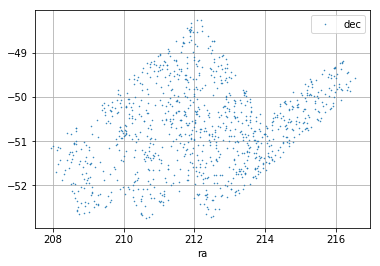

In [8]:
# Pandas has a method for direct plotting
data_sub.plot('ra','dec', markersize=1, marker='.',linestyle='')
plt.grid(True)
plt.show()

In [9]:
# Converting the ecliptic coordinates to the Galactic ones
data_subCoord = [SkyCoord(ra, dec, frame='icrs', unit='deg').galactic for ra, dec in data_sub.values]

In [10]:
# Some transformation functions for the Aitoff projection
lPlot = lambda lb: lb.l.rad if lb.l.rad < np.pi else lb.l.rad-(2*np.pi)
bPlot = lambda lb: lb.b.rad

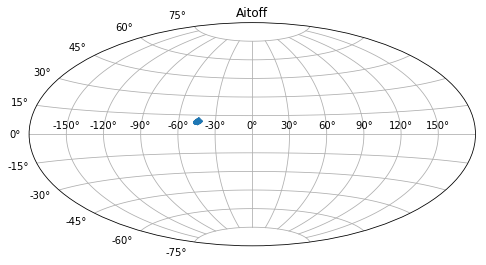

In [11]:
# So the final figure
plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
plt.title("Aitoff")
plt.grid(True)
plt.plot(list(map(lPlot, data_subCoord)),
         list(map(bPlot, data_subCoord)), '.', markersize=1, alpha=1)
plt.show()